<H1>Task-2</H1>

<h4>Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.</h4>

Sample Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Mall_Customers.csv')

print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
print(df.isnull().sum())

print(df.describe())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


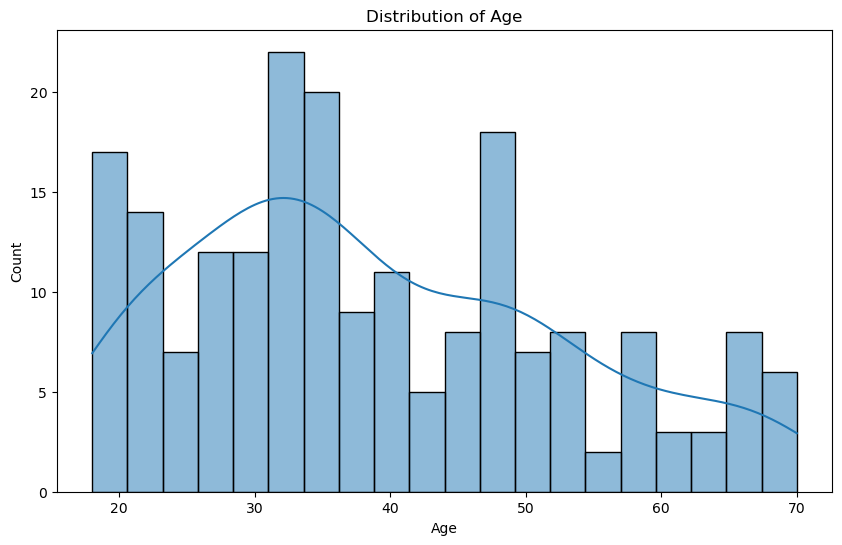

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

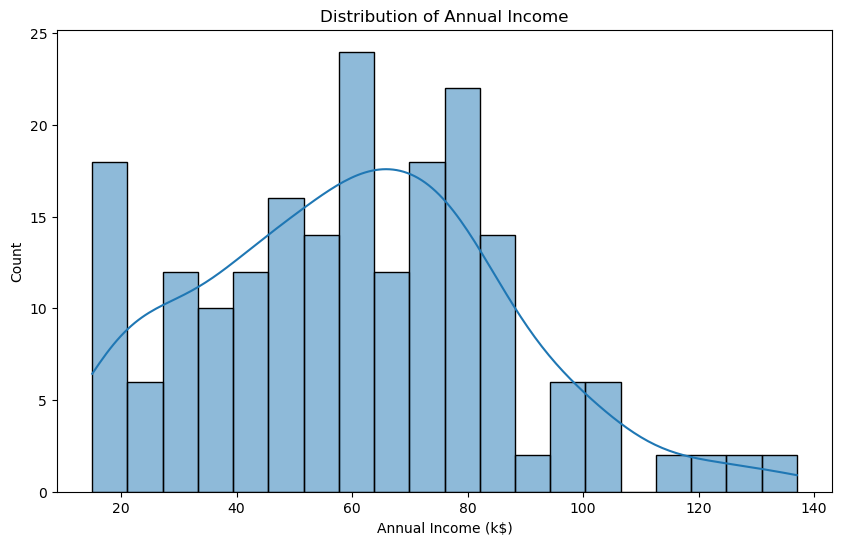

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

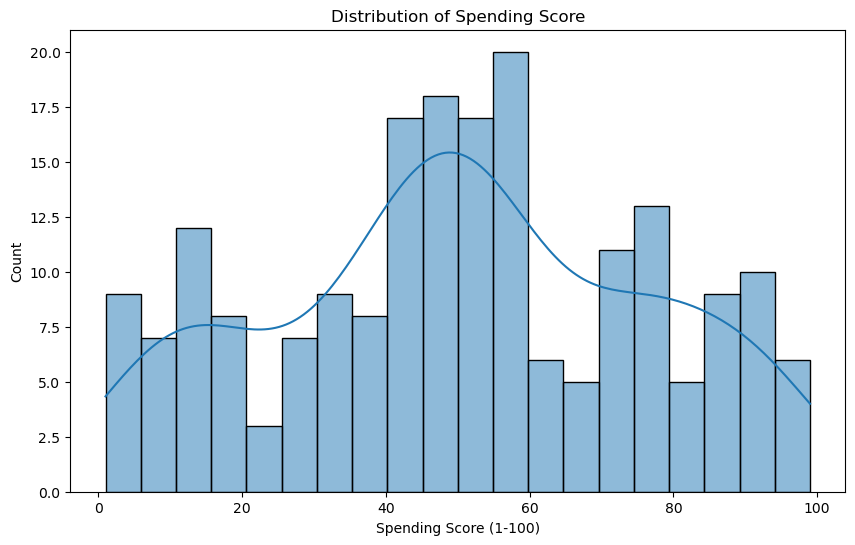

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

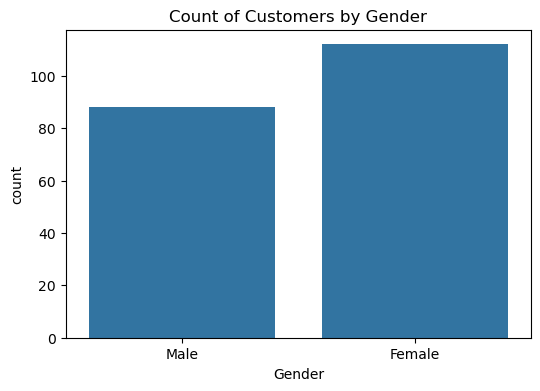

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender')
plt.show()

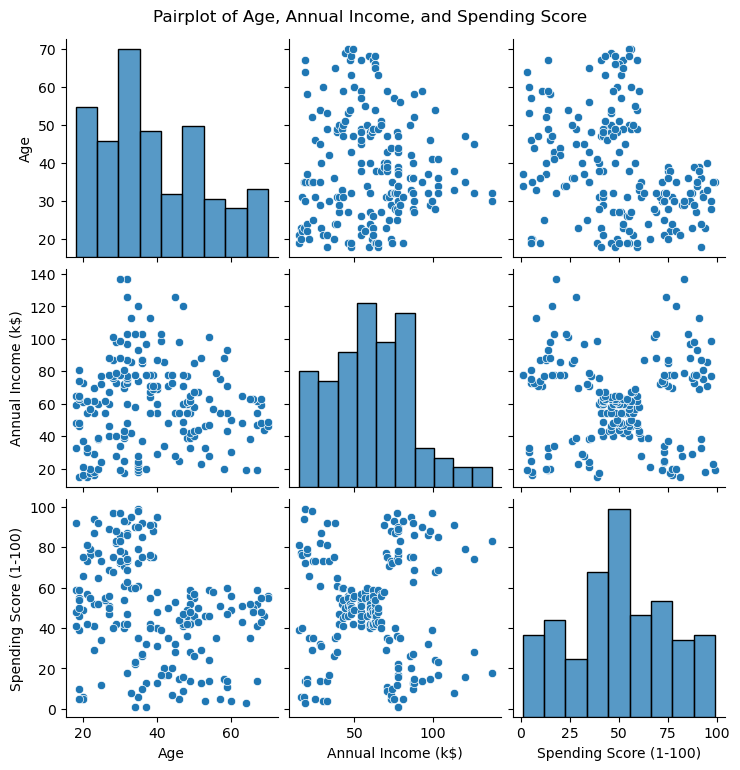

In [13]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()

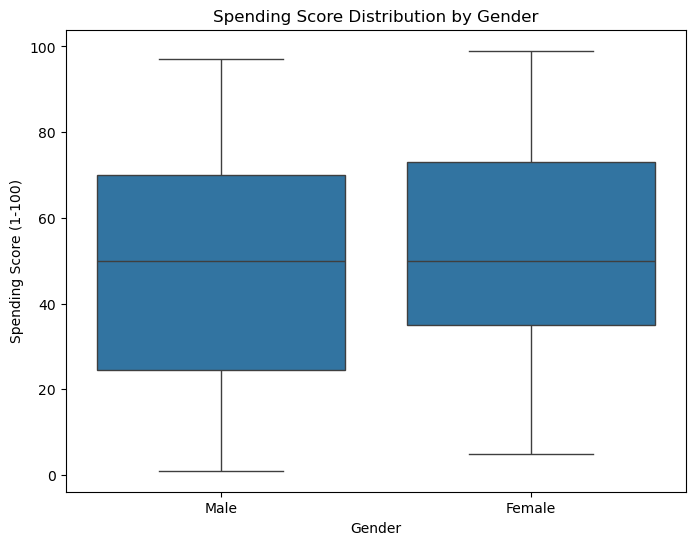

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender')
plt.show()

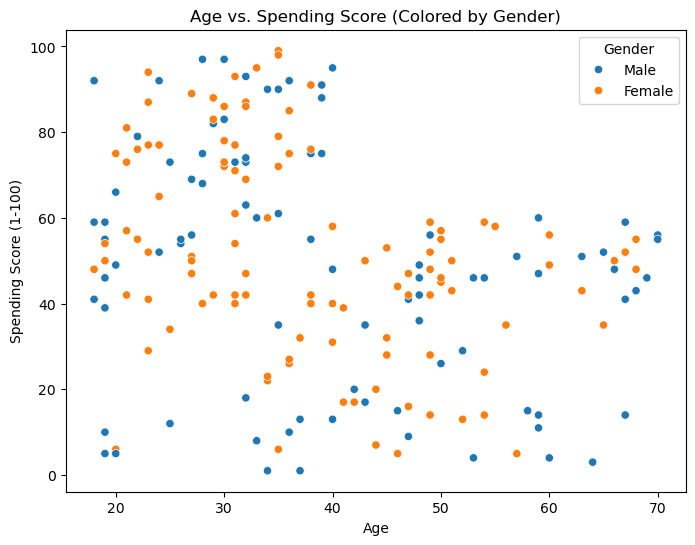

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age vs. Spending Score (Colored by Gender)')
plt.show()

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\KIIT\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:14

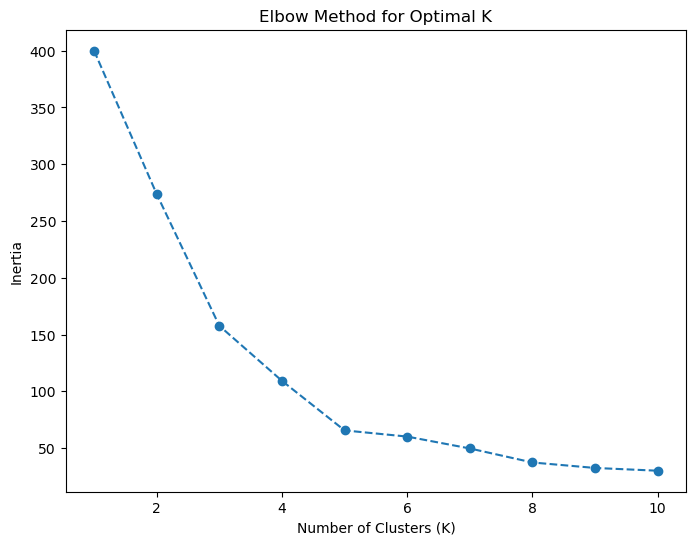

In [20]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

C:\Users\KIIT\Desktop\sample_project\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


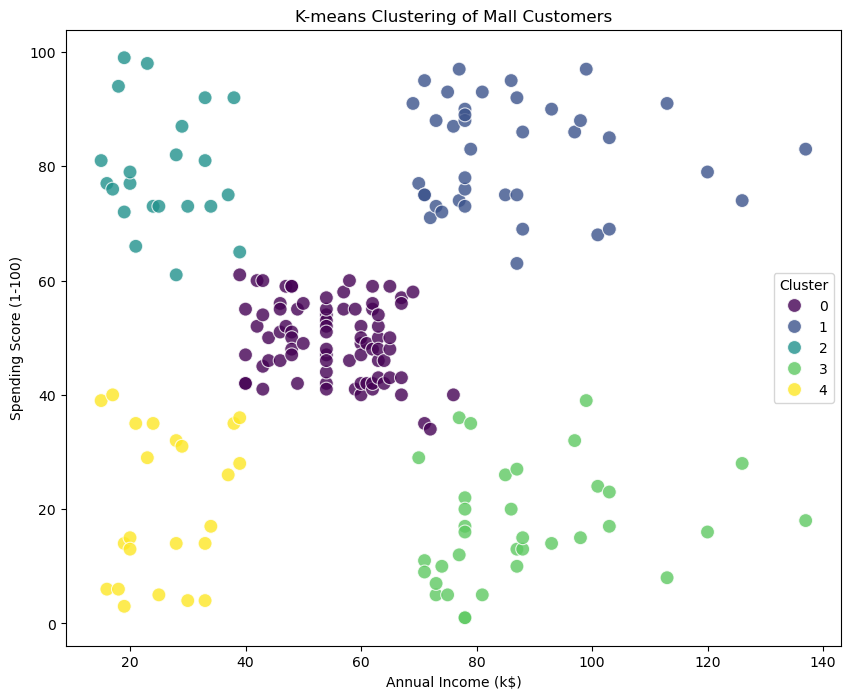

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('K-means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [23]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroid_df['Cluster'] = range(5)

print("\nCentroids:")
print(centroid_df)

print("\nCount of customers in each cluster:")
print(df['Cluster'].value_counts().sort_index())


Centroids:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0           55.296296               49.518519        0
1           86.538462               82.128205        1
2           25.727273               79.363636        2
3           88.200000               17.114286        3
4           26.304348               20.913043        4

Count of customers in each cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64
